In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\akash\dfc.csv",low_memory=False)

In [4]:
df.head()

,ID_REF,GSM388076,GSM388077,GSM388078,GSM388079,GSM388080,GSM388081,GSM388082,GSM388083,GSM388084,...,GSM388145,GSM388146,GSM388147,GSM388148,GSM388149,GSM388150,GSM388151,GSM388152,GSM388153,Log2FC
0,1007_s_at,8.093278,8.093635,9.548053,9.607639,9.503821,9.355020,9.465246,7.941445,9.463370,...,9.785589,10.152994,10.299551,10.298395,9.871991,10.199102,9.005922,9.661047,9.735233,3.032262
1,1053_at,6.839314,6.827462,5.992789,6.003677,5.788727,6.035448,6.084308,6.577905,5.856878,...,6.171784,6.359860,6.309305,6.128360,6.354649,6.462355,6.430275,6.574139,5.955973,1.499104
2,117_at,7.404180,7.545392,6.221293,6.162450,5.648036,6.275815,6.361952,6.235256,6.229713,...,6.211172,6.265019,6.956482,6.162580,7.362484,6.293332,7.458912,6.541931,6.104951,3.597999
3,121_at,7.395993,7.113456,8.360060,8.481419,8.361621,8.639858,8.716301,7.294432,8.317179,...,8.140849,7.289797,7.729058,8.161880,7.461277,7.175775,7.610368,7.229771,8.086099,1.794424
4,1255_g_at,3.037685,2.918100,3.265899,3.341523,3.140711,3.222484,3.258215,3.053035,3.246688,...,3.038964,2.876182,3.069734,2.951653,3.152721,3.025095,2.999806,3.236354,3.163666,1.290642


In [5]:
df.shape

(51633, 80)

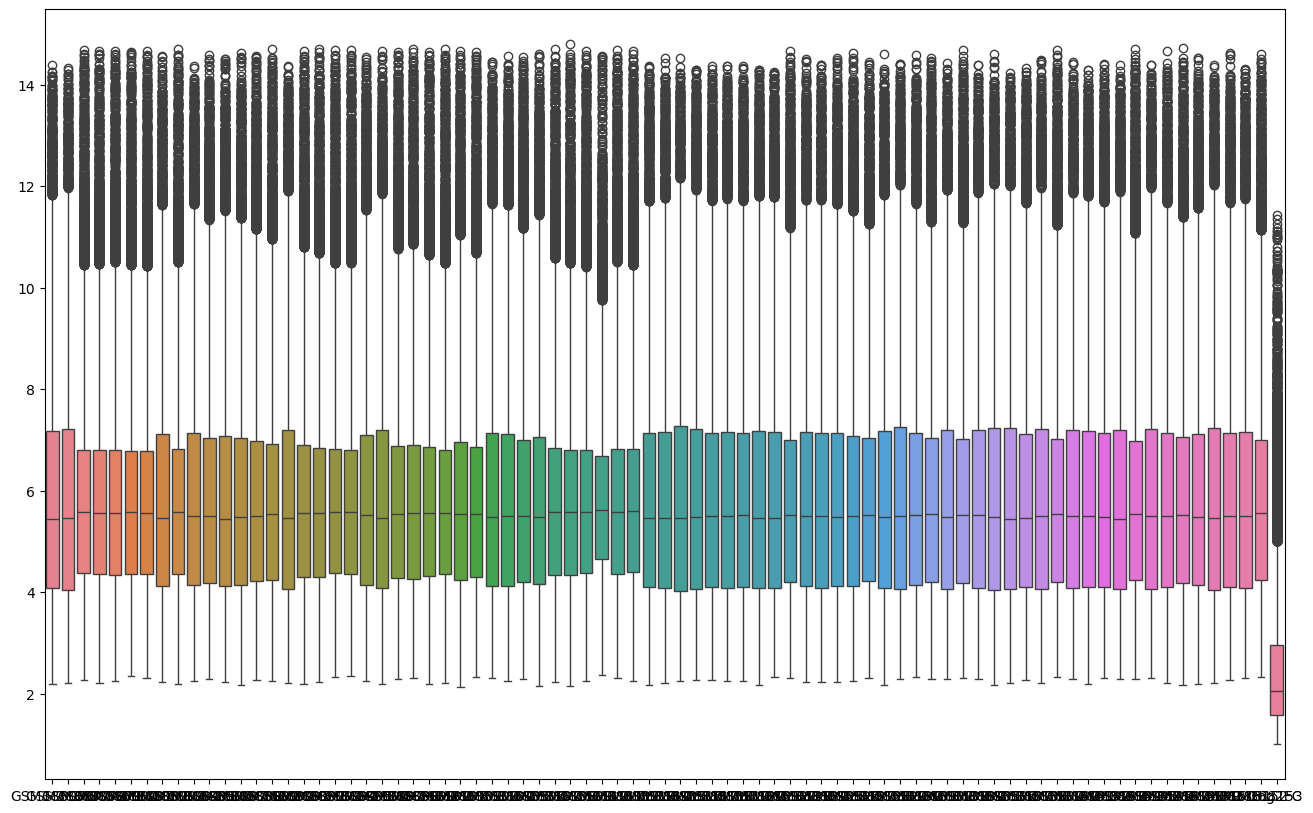

In [6]:
plt.figure(figsize= (16,10))
sns.boxplot(data=df)
plt.show()

In [7]:
df.describe()

,GSM388076,GSM388077,GSM388078,GSM388079,GSM388080,GSM388081,GSM388082,GSM388083,GSM388084,GSM388085,...,GSM388145,GSM388146,GSM388147,GSM388148,GSM388149,GSM388150,GSM388151,GSM388152,GSM388153,Log2FC
count,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,...,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000,51633.000000
mean,5.758177,5.759659,5.711682,5.703490,5.714967,5.706929,5.703953,5.754260,5.708911,5.767029,...,5.747273,5.765903,5.759977,5.751134,5.757419,5.760733,5.762063,5.760766,5.751829,2.468476
std,2.056987,2.063598,1.769589,1.773322,1.804196,1.778194,1.770811,2.019553,1.778815,2.017804,...,1.909147,2.063890,2.022741,1.962978,2.009555,2.072281,2.026874,2.042821,1.917401,1.305083
min,2.180677,2.202657,2.276043,2.213636,2.237922,2.348807,2.302669,2.226962,2.191888,2.251173,...,2.292074,2.312919,2.200206,2.176732,2.195799,2.205795,2.265921,2.309602,2.316552,1.000022
25%,4.082507,4.049784,4.365233,4.352181,4.343511,4.356960,4.357454,4.113784,4.350889,4.131827,...,4.240435,4.051124,4.104273,4.171702,4.135756,4.038092,4.103094,4.084933,4.230608,1.579749
50%,5.447120,5.461445,5.575790,5.564500,5.559182,5.568259,5.564223,5.468221,5.569741,5.494844,...,5.543552,5.501293,5.501125,5.516463,5.486100,5.461183,5.499552,5.488550,5.551092,2.046701
75%,7.178284,7.216721,6.792869,6.798304,6.805843,6.788472,6.781346,7.121396,6.812224,7.130924,...,6.974224,7.218573,7.128106,7.053041,7.105540,7.229975,7.131356,7.151475,6.990578,2.948126
max,14.379370,14.327512,14.682313,14.660806,14.669141,14.634819,14.660241,14.556881,14.694149,14.361909,...,14.697754,14.390330,14.660241,14.715378,14.521728,14.389114,14.626859,14.304630,14.593585,11.436866


# Quantile Normalization

In [9]:
x = df.drop(columns = ['ID_REF','Log2FC'])

In [10]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
df_normalized = pd.DataFrame(qt.fit_transform(x), columns=['GSM388076', 'GSM388077', 'GSM388078', 'GSM388079',
       'GSM388080', 'GSM388081', 'GSM388082', 'GSM388083', 'GSM388084',
       'GSM388085', 'GSM388086', 'GSM388087', 'GSM388088', 'GSM388089',
       'GSM388090', 'GSM388091', 'GSM388092', 'GSM388093', 'GSM388094',
       'GSM388095', 'GSM388096', 'GSM388097', 'GSM388098', 'GSM388099',
       'GSM388100', 'GSM388101', 'GSM388102', 'GSM388103', 'GSM388104',
       'GSM388105', 'GSM388106', 'GSM388107', 'GSM388108', 'GSM388109',
       'GSM388110', 'GSM388111', 'GSM388112', 'GSM388113', 'GSM388114',
       'GSM388115', 'GSM388116', 'GSM388117', 'GSM388118', 'GSM388119',
       'GSM388120', 'GSM388121', 'GSM388122', 'GSM388123', 'GSM388124',
       'GSM388125', 'GSM388126', 'GSM388127', 'GSM388128', 'GSM388129',
       'GSM388130', 'GSM388131', 'GSM388132', 'GSM388133', 'GSM388134',
       'GSM388135', 'GSM388136', 'GSM388137', 'GSM388138', 'GSM388139',
       'GSM388140', 'GSM388141', 'GSM388142', 'GSM388143', 'GSM388144',
       'GSM388145', 'GSM388146', 'GSM388147', 'GSM388148', 'GSM388149',
       'GSM388150', 'GSM388151', 'GSM388152', 'GSM388153'])


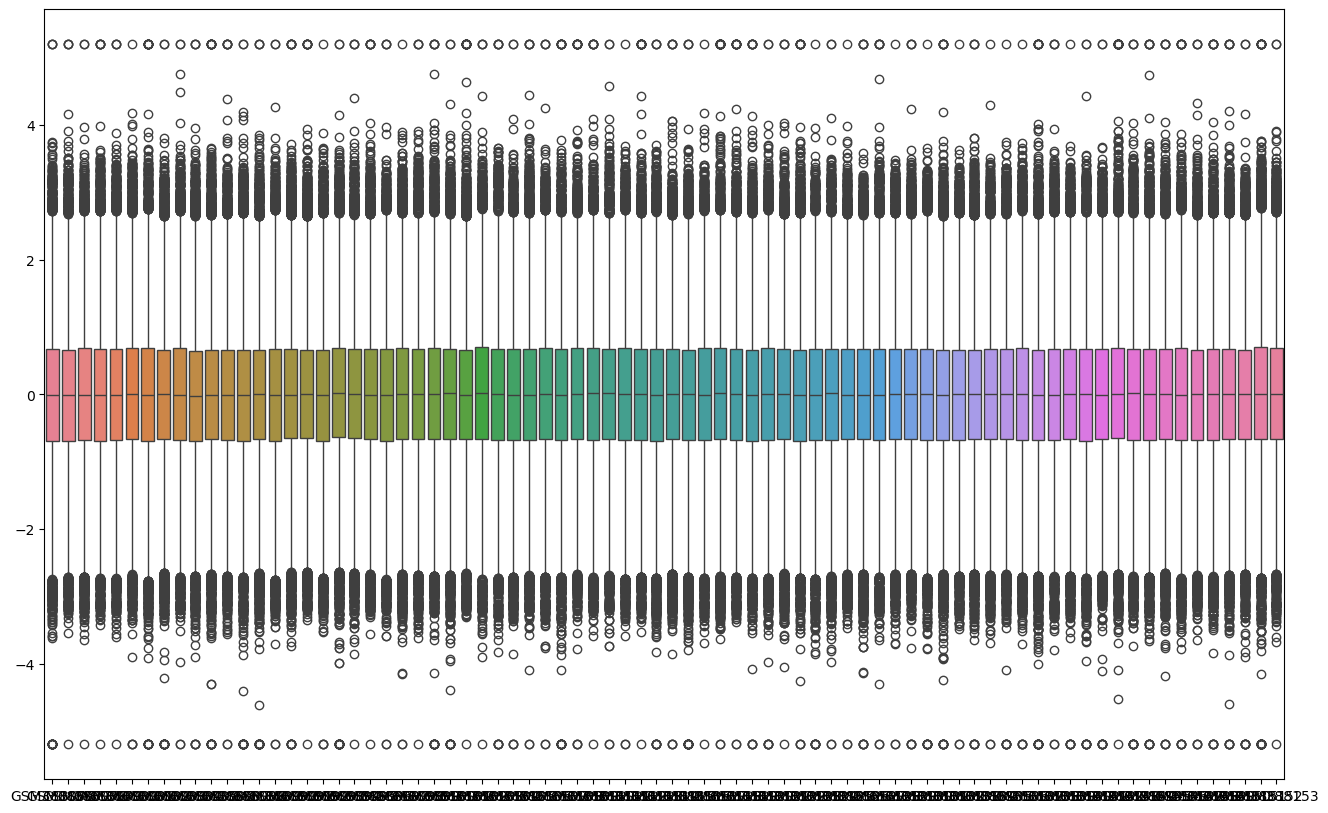

In [11]:
plt.figure(figsize= (16,10))
sns.boxplot(data=df_normalized)
plt.show()

In [12]:
df.columns

Index(['ID_REF', 'GSM388076', 'GSM388077', 'GSM388078', 'GSM388079',
       'GSM388080', 'GSM388081', 'GSM388082', 'GSM388083', 'GSM388084',
       'GSM388085', 'GSM388086', 'GSM388087', 'GSM388088', 'GSM388089',
       'GSM388090', 'GSM388091', 'GSM388092', 'GSM388093', 'GSM388094',
       'GSM388095', 'GSM388096', 'GSM388097', 'GSM388098', 'GSM388099',
       'GSM388100', 'GSM388101', 'GSM388102', 'GSM388103', 'GSM388104',
       'GSM388105', 'GSM388106', 'GSM388107', 'GSM388108', 'GSM388109',
       'GSM388110', 'GSM388111', 'GSM388112', 'GSM388113', 'GSM388114',
       'GSM388115', 'GSM388116', 'GSM388117', 'GSM388118', 'GSM388119',
       'GSM388120', 'GSM388121', 'GSM388122', 'GSM388123', 'GSM388124',
       'GSM388125', 'GSM388126', 'GSM388127', 'GSM388128', 'GSM388129',
       'GSM388130', 'GSM388131', 'GSM388132', 'GSM388133', 'GSM388134',
       'GSM388135', 'GSM388136', 'GSM388137', 'GSM388138', 'GSM388139',
       'GSM388140', 'GSM388141', 'GSM388142', 'GSM388143', 'GSM3881

In [13]:
df.shape

(51633, 80)

In [14]:
 nrm = df[['GSM388076', 'GSM388077', 'GSM388078', 'GSM388079',
       'GSM388080', 'GSM388081', 'GSM388082', 'GSM388083', 'GSM388084',
       'GSM388085', 'GSM388086', 'GSM388087', 'GSM388088', 'GSM388089',
       'GSM388090', 'GSM388091', 'GSM388092', 'GSM388093', 'GSM388094',
       'GSM388095', 'GSM388096', 'GSM388097', 'GSM388098', 'GSM388099',
       'GSM388100', 'GSM388101', 'GSM388102', 'GSM388103', 'GSM388104',
       'GSM388105', 'GSM388106', 'GSM388107', 'GSM388108', 'GSM388109',
       'GSM388110', 'GSM388111', 'GSM388112', 'GSM388113', 'GSM388114']]

tmr = df[['GSM388115', 'GSM388116', 'GSM388117', 'GSM388118', 'GSM388119',
       'GSM388120', 'GSM388121', 'GSM388122', 'GSM388123', 'GSM388124',
       'GSM388125', 'GSM388126', 'GSM388127', 'GSM388128', 'GSM388129',
       'GSM388130', 'GSM388131', 'GSM388132', 'GSM388133', 'GSM388134',
       'GSM388135', 'GSM388136', 'GSM388137', 'GSM388138', 'GSM388139',
       'GSM388140', 'GSM388141', 'GSM388142', 'GSM388143', 'GSM388144',
       'GSM388145', 'GSM388146', 'GSM388147', 'GSM388148', 'GSM388149',
      'GSM388150', 'GSM388151', 'GSM388152', 'GSM388153']]

In [15]:
mean_nrm = nrm.mean(axis=1)
mean_nrm

0        9.261641
1        6.197756
2        6.454707
3        8.057237
4        3.167108
           ...   
51628    8.666788
51629    7.982451
51630    8.078935
51631    3.355581
51632    3.305403
Length: 51633, dtype: float64

In [16]:
df["Normal_Mean"] = nrm.mean(axis=1)
df["Tumor_Mean"] = tmr.mean(axis=1)

# Step 2: Compute Log2 Fold Change (Log2FC)
df["Log2"] = df["Tumor_Mean"] - df["Normal_Mean"]


In [17]:
df.head()

,ID_REF,GSM388076,GSM388077,GSM388078,GSM388079,GSM388080,GSM388081,GSM388082,GSM388083,GSM388084,...,GSM388148,GSM388149,GSM388150,GSM388151,GSM388152,GSM388153,Log2FC,Normal_Mean,Tumor_Mean,Log2
0,1007_s_at,8.093278,8.093635,9.548053,9.607639,9.503821,9.355020,9.465246,7.941445,9.463370,...,10.298395,9.871991,10.199102,9.005922,9.661047,9.735233,3.032262,9.261641,9.869978,0.608337
1,1053_at,6.839314,6.827462,5.992789,6.003677,5.788727,6.035448,6.084308,6.577905,5.856878,...,6.128360,6.354649,6.462355,6.430275,6.574139,5.955973,1.499104,6.197756,6.443461,0.245706
2,117_at,7.404180,7.545392,6.221293,6.162450,5.648036,6.275815,6.361952,6.235256,6.229713,...,6.162580,7.362484,6.293332,7.458912,6.541931,6.104951,3.597999,6.454707,6.787459,0.332752
3,121_at,7.395993,7.113456,8.360060,8.481419,8.361621,8.639858,8.716301,7.294432,8.317179,...,8.161880,7.461277,7.175775,7.610368,7.229771,8.086099,1.794424,8.057237,7.554838,-0.502399
4,1255_g_at,3.037685,2.918100,3.265899,3.341523,3.140711,3.222484,3.258215,3.053035,3.246688,...,2.951653,3.152721,3.025095,2.999806,3.236354,3.163666,1.290642,3.167108,3.114866,-0.052242


In [18]:
tmr.shape

(51633, 39)

# Scaling Standardization (Z- Score)

In [20]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [21]:
scale = StandardScaler()
sd = scale.fit_transform(df_normalized)

In [22]:
sd

array([[ 1.04543065,  1.05613952,  1.92412932, ...,  1.50122452,
         1.75720554,  1.86809651],
       [ 0.53884724,  0.51056049,  0.22724289, ...,  0.38711529,
         0.42924802,  0.18624982],
       [ 0.76515774,  0.81458643,  0.35761562, ...,  0.80385383,
         0.41369166,  0.26043328],
       ...,
       [ 0.88242851,  0.97701817,  1.56269923, ...,  0.84287345,
         0.83960984,  1.10919252],
       [-1.45802887, -1.42094592, -1.22187333, ..., -1.29050407,
        -1.59553887, -1.32910599],
       [-1.53457679, -1.43296305, -1.25552058, ..., -1.46626154,
        -1.63327751, -1.45283869]])

In [23]:
dfs = pd.DataFrame(sd,columns =['GSM388076', 'GSM388077', 'GSM388078', 'GSM388079',
       'GSM388080', 'GSM388081', 'GSM388082', 'GSM388083', 'GSM388084',
       'GSM388085', 'GSM388086', 'GSM388087', 'GSM388088', 'GSM388089',
       'GSM388090', 'GSM388091', 'GSM388092', 'GSM388093', 'GSM388094',
       'GSM388095', 'GSM388096', 'GSM388097', 'GSM388098', 'GSM388099',
       'GSM388100', 'GSM388101', 'GSM388102', 'GSM388103', 'GSM388104',
       'GSM388105', 'GSM388106', 'GSM388107', 'GSM388108', 'GSM388109',
       'GSM388110', 'GSM388111', 'GSM388112', 'GSM388113', 'GSM388114',
       'GSM388115', 'GSM388116', 'GSM388117', 'GSM388118', 'GSM388119',
       'GSM388120', 'GSM388121', 'GSM388122', 'GSM388123', 'GSM388124',
       'GSM388125', 'GSM388126', 'GSM388127', 'GSM388128', 'GSM388129',
       'GSM388130', 'GSM388131', 'GSM388132', 'GSM388133', 'GSM388134',
       'GSM388135', 'GSM388136', 'GSM388137', 'GSM388138', 'GSM388139',
       'GSM388140', 'GSM388141', 'GSM388142', 'GSM388143', 'GSM388144',
       'GSM388145', 'GSM388146', 'GSM388147', 'GSM388148', 'GSM388149',
       'GSM388150', 'GSM388151', 'GSM388152', 'GSM388153'])

In [24]:
dfs.head()

,GSM388076,GSM388077,GSM388078,GSM388079,GSM388080,GSM388081,GSM388082,GSM388083,GSM388084,GSM388085,...,GSM388144,GSM388145,GSM388146,GSM388147,GSM388148,GSM388149,GSM388150,GSM388151,GSM388152,GSM388153
0,1.045431,1.056140,1.924129,1.954372,1.869381,1.828123,1.884619,1.008897,1.903344,1.392594,...,2.064234,1.883090,1.949846,2.042268,2.083250,1.872459,1.944724,1.501225,1.757206,1.868097
1,0.538847,0.510560,0.227243,0.230245,0.120459,0.255160,0.296188,0.441241,0.139433,0.499772,...,0.492340,0.302792,0.322467,0.335327,0.281232,0.357224,0.371019,0.387115,0.429248,0.186250
2,0.765158,0.814586,0.357616,0.322640,0.041742,0.390450,0.447972,0.311231,0.339611,0.513225,...,0.515400,0.320763,0.287617,0.609343,0.296290,0.782407,0.309968,0.803854,0.413692,0.260433
3,0.762660,0.631104,1.458012,1.513548,1.422551,1.555113,1.588970,0.739417,1.410327,0.780535,...,0.647079,1.198924,0.690626,0.914144,1.165287,0.823942,0.657279,0.865882,0.710015,1.184628
4,-1.603840,-1.768907,-1.567042,-1.457325,-1.668105,-1.619175,-1.559675,-1.643389,-1.565743,-1.769661,...,-1.545205,-1.775547,-1.838825,-1.595529,-1.843547,-1.513445,-1.605699,-1.670406,-1.350119,-1.571492


In [25]:
dfs.shape

(51633, 78)

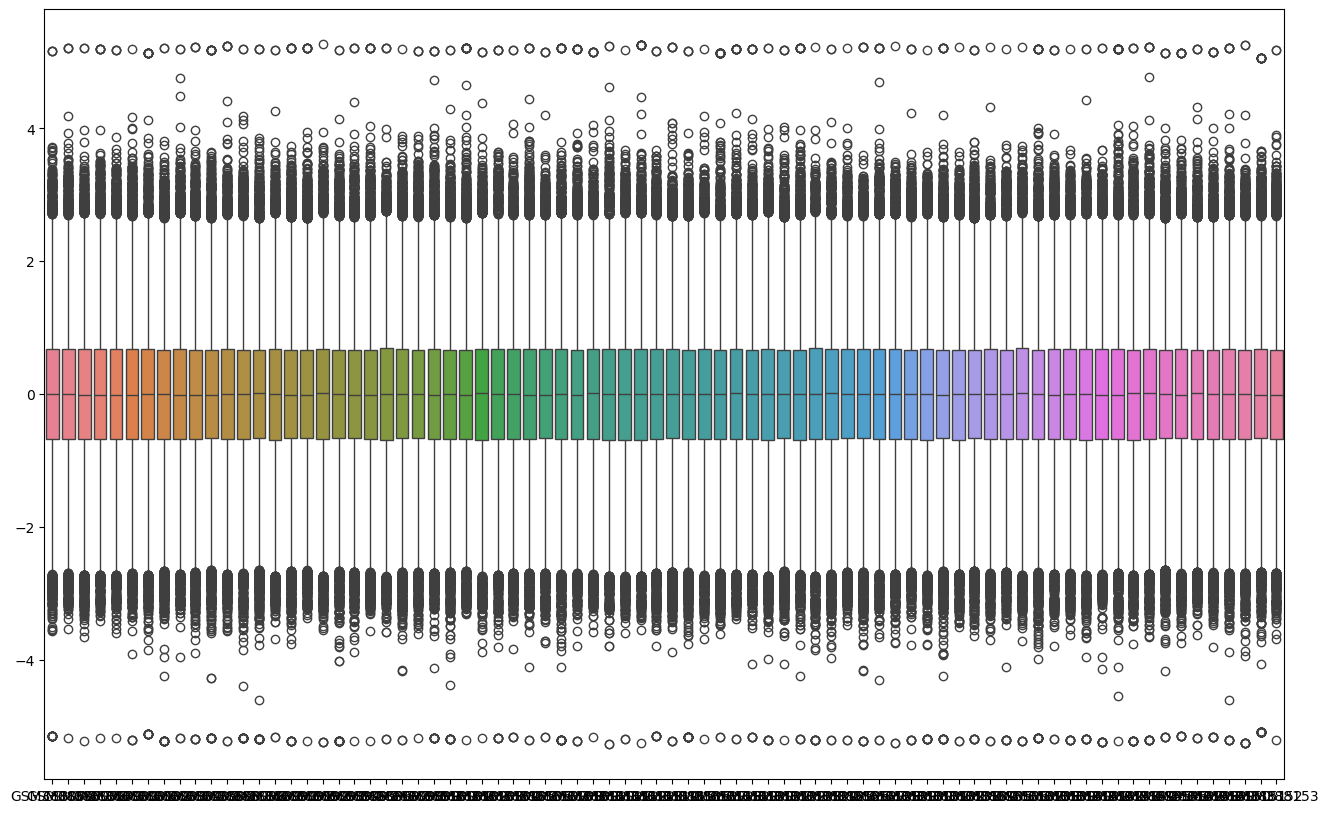

In [26]:
plt.figure(figsize= (16,10))
sns.boxplot(data=dfs)
plt.show()

# T- TEST

In [28]:
from scipy.stats import ttest_ind

In [29]:
from scipy import stats

In [30]:
normal_samples = nrm
tumor_samples = tmr
t_stat, p_values = stats.ttest_ind(normal_samples, tumor_samples, axis=1, equal_var=False, nan_policy='omit')

# Store results in a DataFrame
t = pd.DataFrame({"T-Statistic": t_stat,"P-Value": p_values})

# # Filter for differentially expressed genes (DEGs) using p-value < 0.05
# deg_results = t_test_results[t_test_results["P-Value"] < 0.05]


In [31]:
t.shape

(51633, 2)

In [32]:
t.head()

,T-Statistic,P-Value
0,-4.348737,0.000043
1,-3.442910,0.000955
2,-2.129311,0.036707
3,4.797608,0.000009
4,0.968052,0.336298


In [33]:
dfa = pd.concat([df,t], axis=1)

In [34]:
dfa.head()

,ID_REF,GSM388076,GSM388077,GSM388078,GSM388079,GSM388080,GSM388081,GSM388082,GSM388083,GSM388084,...,GSM388150,GSM388151,GSM388152,GSM388153,Log2FC,Normal_Mean,Tumor_Mean,Log2,T-Statistic,P-Value
0,1007_s_at,8.093278,8.093635,9.548053,9.607639,9.503821,9.355020,9.465246,7.941445,9.463370,...,10.199102,9.005922,9.661047,9.735233,3.032262,9.261641,9.869978,0.608337,-4.348737,0.000043
1,1053_at,6.839314,6.827462,5.992789,6.003677,5.788727,6.035448,6.084308,6.577905,5.856878,...,6.462355,6.430275,6.574139,5.955973,1.499104,6.197756,6.443461,0.245706,-3.442910,0.000955
2,117_at,7.404180,7.545392,6.221293,6.162450,5.648036,6.275815,6.361952,6.235256,6.229713,...,6.293332,7.458912,6.541931,6.104951,3.597999,6.454707,6.787459,0.332752,-2.129311,0.036707
3,121_at,7.395993,7.113456,8.360060,8.481419,8.361621,8.639858,8.716301,7.294432,8.317179,...,7.175775,7.610368,7.229771,8.086099,1.794424,8.057237,7.554838,-0.502399,4.797608,0.000009
4,1255_g_at,3.037685,2.918100,3.265899,3.341523,3.140711,3.222484,3.258215,3.053035,3.246688,...,3.025095,2.999806,3.236354,3.163666,1.290642,3.167108,3.114866,-0.052242,0.968052,0.336298


In [35]:
dfa.shape

(51633, 85)

In [36]:
dfa.head()

,ID_REF,GSM388076,GSM388077,GSM388078,GSM388079,GSM388080,GSM388081,GSM388082,GSM388083,GSM388084,...,GSM388150,GSM388151,GSM388152,GSM388153,Log2FC,Normal_Mean,Tumor_Mean,Log2,T-Statistic,P-Value
0,1007_s_at,8.093278,8.093635,9.548053,9.607639,9.503821,9.355020,9.465246,7.941445,9.463370,...,10.199102,9.005922,9.661047,9.735233,3.032262,9.261641,9.869978,0.608337,-4.348737,0.000043
1,1053_at,6.839314,6.827462,5.992789,6.003677,5.788727,6.035448,6.084308,6.577905,5.856878,...,6.462355,6.430275,6.574139,5.955973,1.499104,6.197756,6.443461,0.245706,-3.442910,0.000955
2,117_at,7.404180,7.545392,6.221293,6.162450,5.648036,6.275815,6.361952,6.235256,6.229713,...,6.293332,7.458912,6.541931,6.104951,3.597999,6.454707,6.787459,0.332752,-2.129311,0.036707
3,121_at,7.395993,7.113456,8.360060,8.481419,8.361621,8.639858,8.716301,7.294432,8.317179,...,7.175775,7.610368,7.229771,8.086099,1.794424,8.057237,7.554838,-0.502399,4.797608,0.000009
4,1255_g_at,3.037685,2.918100,3.265899,3.341523,3.140711,3.222484,3.258215,3.053035,3.246688,...,3.025095,2.999806,3.236354,3.163666,1.290642,3.167108,3.114866,-0.052242,0.968052,0.336298


In [38]:
from statsmodels.stats.multitest import multipletests

In [39]:
dfa["adjusted_p"] = multipletests(dfa["P-Value"], method="fdr_bh")[1]

# Print significant genes (adjusted p < 0.05)


In [40]:
dfa.head()

,ID_REF,GSM388076,GSM388077,GSM388078,GSM388079,GSM388080,GSM388081,GSM388082,GSM388083,GSM388084,...,GSM388151,GSM388152,GSM388153,Log2FC,Normal_Mean,Tumor_Mean,Log2,T-Statistic,P-Value,adjusted_p
0,1007_s_at,8.093278,8.093635,9.548053,9.607639,9.503821,9.355020,9.465246,7.941445,9.463370,...,9.005922,9.661047,9.735233,3.032262,9.261641,9.869978,0.608337,-4.348737,0.000043,0.000109
1,1053_at,6.839314,6.827462,5.992789,6.003677,5.788727,6.035448,6.084308,6.577905,5.856878,...,6.430275,6.574139,5.955973,1.499104,6.197756,6.443461,0.245706,-3.442910,0.000955,0.001757
2,117_at,7.404180,7.545392,6.221293,6.162450,5.648036,6.275815,6.361952,6.235256,6.229713,...,7.458912,6.541931,6.104951,3.597999,6.454707,6.787459,0.332752,-2.129311,0.036707,0.050197
3,121_at,7.395993,7.113456,8.360060,8.481419,8.361621,8.639858,8.716301,7.294432,8.317179,...,7.610368,7.229771,8.086099,1.794424,8.057237,7.554838,-0.502399,4.797608,0.000009,0.000028
4,1255_g_at,3.037685,2.918100,3.265899,3.341523,3.140711,3.222484,3.258215,3.053035,3.246688,...,2.999806,3.236354,3.163666,1.290642,3.167108,3.114866,-0.052242,0.968052,0.336298,0.382890


In [41]:
sig = dfa[dfa['adjusted_p'] < 0.05]

In [42]:
sig.shape

(37739, 86)

# DEG

In [44]:
def categorize_gene(dfa):
    if dfa["P-Value"] < 0.05:  # Significant genes
        if dfa["Log2"] > 1:      # Upregulated (Log2FC > 1)
            return "Down"
        elif dfa["Log2"] < -1:   # Downregulated (Log2FC < -1)
            return "UP"
    return "No Change"

In [45]:
dfa["Dt"] = dfa.apply(categorize_gene, axis=1)

In [46]:
dfa['Dt'].value_counts()

Dt
No Change    48977
Down          2306
UP             350
Name: count, dtype: int64

In [47]:
dfa.head()

,ID_REF,GSM388076,GSM388077,GSM388078,GSM388079,GSM388080,GSM388081,GSM388082,GSM388083,GSM388084,...,GSM388152,GSM388153,Log2FC,Normal_Mean,Tumor_Mean,Log2,T-Statistic,P-Value,adjusted_p,Dt
0,1007_s_at,8.093278,8.093635,9.548053,9.607639,9.503821,9.355020,9.465246,7.941445,9.463370,...,9.661047,9.735233,3.032262,9.261641,9.869978,0.608337,-4.348737,0.000043,0.000109,No Change
1,1053_at,6.839314,6.827462,5.992789,6.003677,5.788727,6.035448,6.084308,6.577905,5.856878,...,6.574139,5.955973,1.499104,6.197756,6.443461,0.245706,-3.442910,0.000955,0.001757,No Change
2,117_at,7.404180,7.545392,6.221293,6.162450,5.648036,6.275815,6.361952,6.235256,6.229713,...,6.541931,6.104951,3.597999,6.454707,6.787459,0.332752,-2.129311,0.036707,0.050197,No Change
3,121_at,7.395993,7.113456,8.360060,8.481419,8.361621,8.639858,8.716301,7.294432,8.317179,...,7.229771,8.086099,1.794424,8.057237,7.554838,-0.502399,4.797608,0.000009,0.000028,No Change
4,1255_g_at,3.037685,2.918100,3.265899,3.341523,3.140711,3.222484,3.258215,3.053035,3.246688,...,3.236354,3.163666,1.290642,3.167108,3.114866,-0.052242,0.968052,0.336298,0.382890,No Change


# Volcano PLOT

In [49]:
p_threshold = 0.05
fc_threshold = 1


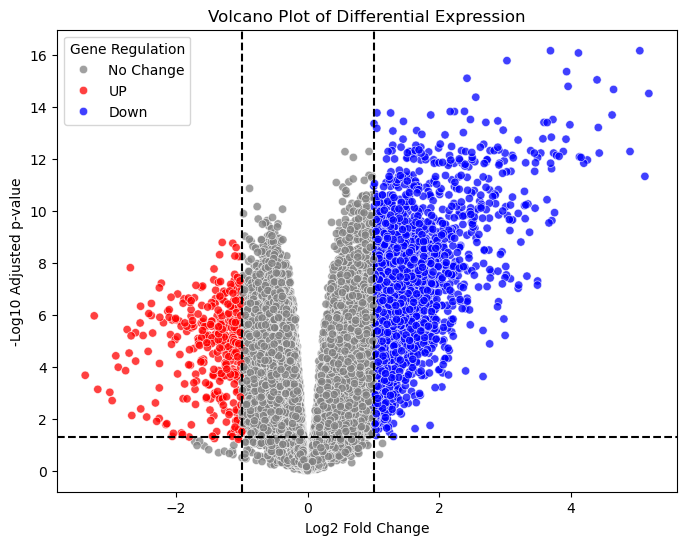

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfa, x="Log2", y=-np.log10(dfa["adjusted_p"]), hue="Dt",
                palette={"UP": "red", "Down": "blue", "No Change": "gray"},
                alpha=0.75)

# Add threshold lines
plt.axhline(y=-np.log10(p_threshold), linestyle="--", color="black")  # P-value threshold
plt.axvline(x=fc_threshold, linestyle="--", color="black")  # Log2FC threshold
plt.axvline(x=-fc_threshold, linestyle="--", color="black")  # Log2FC threshold

# Labels
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted p-value")
plt.title("Volcano Plot of Differential Expression")
plt.legend(title="Gene Regulation")
plt.show()

In [67]:
dfa.to_csv('GSMNEW.csv',index=False)